<a href="https://colab.research.google.com/github/teszerrakt/cnn-flower-dataset/blob/main/ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders --upgrade --quiet

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/MLP - Flower Dataset', output='dataset', seed=1337, ratio=(.8, .2))

Copying files: 300 files [01:08,  4.40 files/s]


In [ ]:
def to_grayscale(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

data_gen = Imgen(
        rescale=1./255,
        preprocessing_function = to_grayscale,
        horizontal_flip=True
)

In [ ]:
training_set = data_gen.flow_from_directory(
        'dataset/train',
        target_size=(320, 240),
        class_mode='categorical'
)

Found 240 images belonging to 3 classes.


In [ ]:
validation_set = data_gen.flow_from_directory(
        'dataset/val',
        target_size=(320, 240),
        class_mode='categorical'
)

Found 60 images belonging to 3 classes.


In [ ]:
c = training_set.class_indices
classes = list(c.keys())
classes

['daisy', 'rose', 'tulip']

In [ ]:
X, Y = next(training_set)

def plot_images(img, labels):
    plt.figure(figsize=(16, 12))
    for i in range(16):
        img[i] = np.expand_dims(img[i], axis=0)
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis('off')

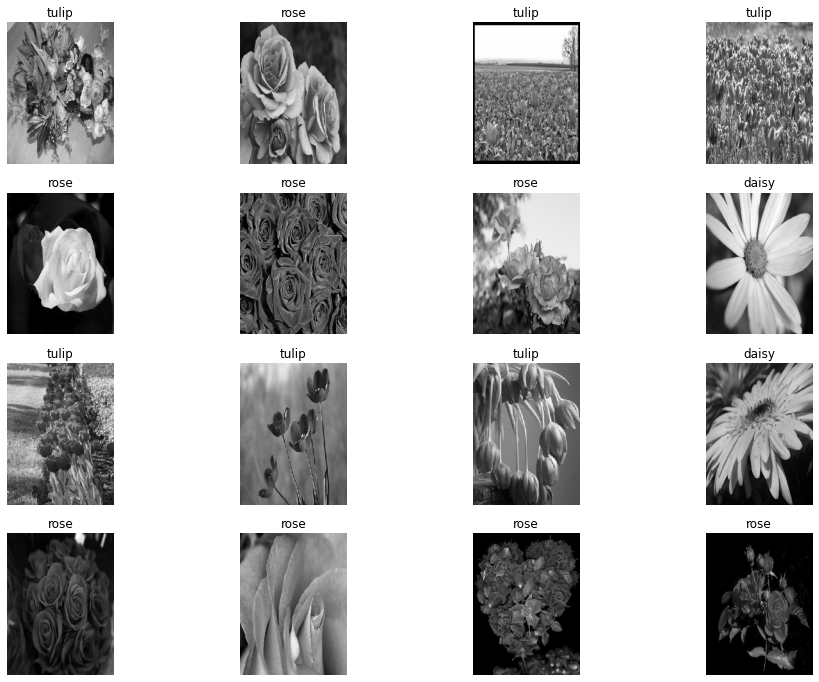

In [ ]:
plot_images(X, Y)

In [ ]:
from keras.models import Sequential, save_model, load_model

model = Sequential([
  #Convolutional Layer
  Conv2D(8, 3, input_shape=(320, 240, 3)),
  #Pooling Layer
  MaxPooling2D(pool_size=2),
  #Fully Connected Layer
  Flatten(),
  Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 318, 238, 8)       224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 159, 119, 8)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 151368)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 454107    
Total params: 454,331
Trainable params: 454,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(training_set, validation_data=validation_set, epochs=50)

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 19.7437 - accuracy: 0.3018 - val_loss: 21.9018 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 8s 988ms/step - loss: 13.9426 - accuracy: 0.3794 - val_loss: 8.1344 - val_accuracy: 0.4167
Epoch 3/50
8/8 [==============================] - 8s 922ms/step - loss: 4.2653 - accuracy: 0.5615 - val_loss: 5.1280 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 8s 923ms/step - loss: 3.0171 - accuracy: 0.4105 - val_loss: 1.9190 - val_accuracy: 0.4167
Epoch 5/50
8/8 [==============================] - 8s 921ms/step - loss: 1.3356 - accuracy: 0.5166 - val_loss: 1.7014 - val_accuracy: 0.3000
Epoch 6/50
8/8 [==============================] - 8s 923ms/step - loss: 0.9376 - accuracy: 0.5864 - val_loss: 1.1136 - val_accuracy: 0.4333
Epoch 7/50
8/8 [==============================] - 8s 943ms/step - loss: 0.6994 - accuracy: 0.6600 - val_loss: 1.1624 - val_accuracy: 0.4167
Epoch 8/50
8/8 [====

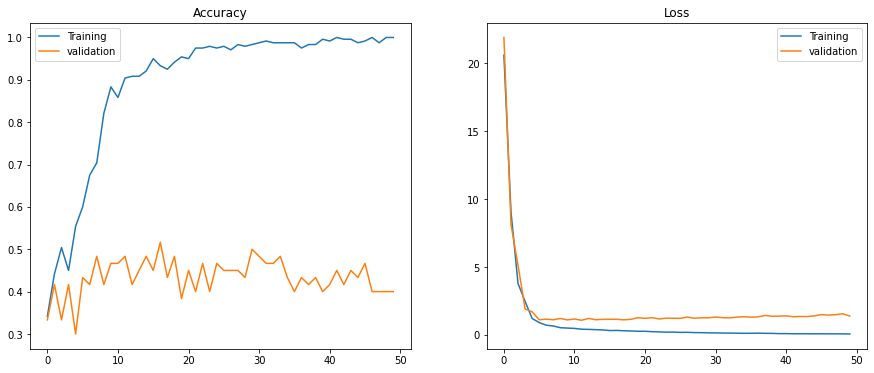

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()